In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations
import pandas as pd

from cologne_percipitation.plotting import plot_2station_percipitation_per_day
from cologne_percipitation.weather_data import TwoStationWeaterData
%reload_ext autoreload

In [2]:
cologne = Point(50.9375, 6.9603, 53)

In [3]:
cologne.get_stations()

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance,score
id,,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2023-04-15,1945-01-01,2023-04-15,1945-01-01,2022-01-01,5898.264867,0.887458
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2023-04-17,1931-01-01,2023-04-15,1931-01-01,2022-01-01,16476.260952,0.674121
D1024,Dormagen-Zons,DE,NW,<NA>,<NA>,51.1157,6.8510,37.0,Europe/Berlin,2006-08-01,2023-04-15,2006-08-02,2022-04-25,2006-01-01,2022-01-01,21238.269087,0.617630
10505,Bonn-Hangelar,DE,NRW,10505,<NA>,50.7667,7.1667,60.0,Europe/Berlin,2018-01-27,2023-04-17,2011-04-01,2023-02-28,2011-01-01,2022-01-01,23888.035821,0.582491


# Cologne Stammheim

In [4]:
stations = Stations()
stations = stations.nearby(50.9894, 6.977)
station_stammheim = stations.fetch(1)

In [5]:
station_stammheim

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2023-04-15,1945-01-01,2023-04-15,1945-01-01,2022-01-01,48.995254


# Cologne Airport

In [6]:
stations = Stations()
stations = stations.nearby(50.8667, 7.1667)
station_airport = stations.fetch(1)

In [7]:
station_airport

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2023-04-17,1931-01-01,2023-04-15,1931-01-01,2022-01-01,0.0


# Init Data Class 

In [8]:
twoWeatherStations = TwoStationWeaterData(station_airport, station_stammheim)

# Daily Data 2023

In [33]:
start = datetime(2023, 1, 1)
end = datetime.now()
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.tail()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-04-16,10.00,7.50,13.70,2.35,NaN,334.0,16.10,29.5,1021.65,19.0
2023-04-17,11.60,7.85,15.75,0.00,NaN,13.5,12.70,35.3,1024.35,242.0
2023-04-18,10.20,4.15,15.15,0.00,NaN,73.5,17.25,38.2,1024.70,429.0
2023-04-19,11.25,7.50,14.45,0.00,NaN,48.5,18.55,48.0,1024.20,NaN
2023-04-20,7.10,4.35,10.60,2.65,NaN,56.0,15.15,37.0,1018.20,NaN


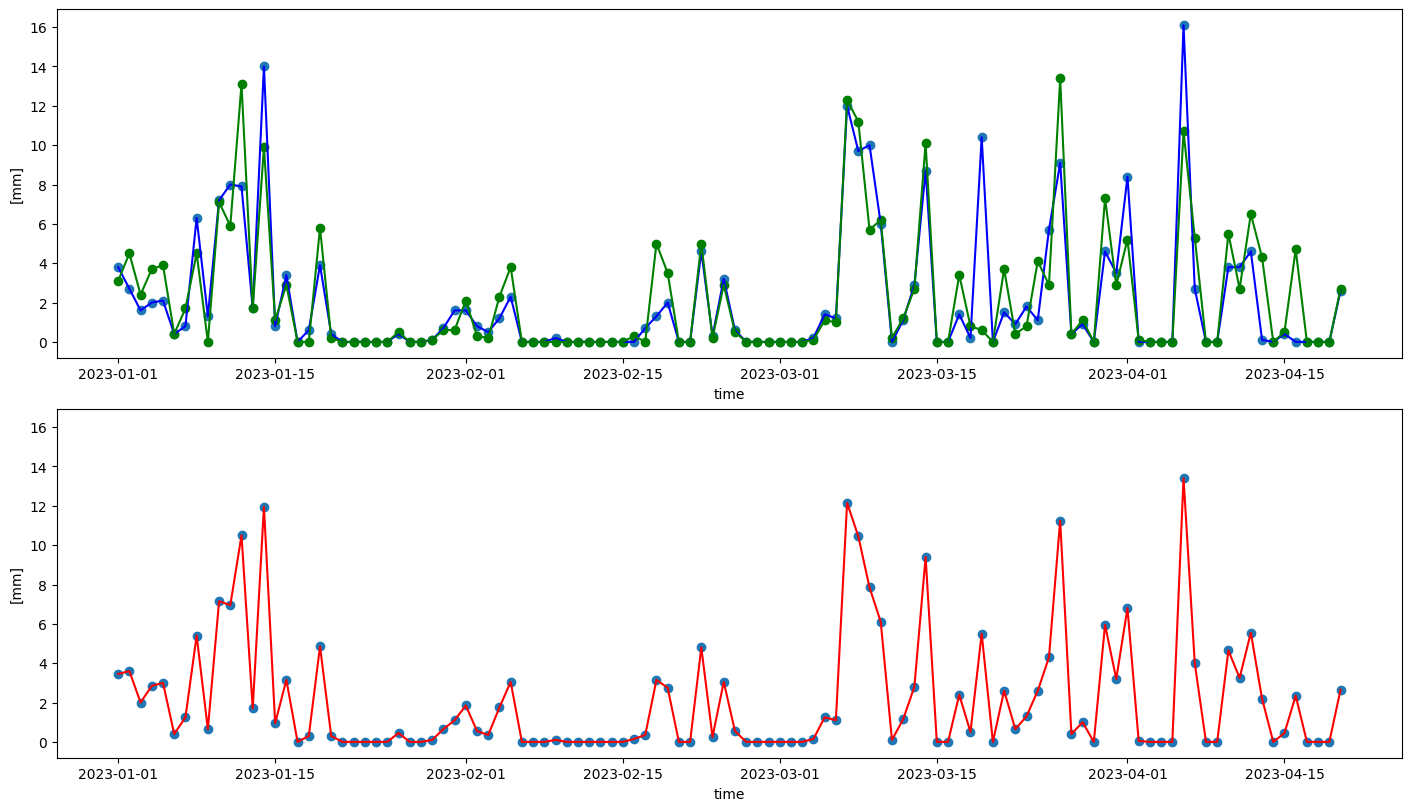

In [34]:
plot_2station_percipitation_per_day(stammheim, airport)

# Daily Data 2022

In [11]:
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-01,12.50,9.65,14.90,0.30,0.0,178.5,12.20,29.5,1023.65,135.0
2022-01-02,11.15,9.00,13.85,10.30,0.0,180.0,15.95,56.2,1014.90,2.0
2022-01-03,9.65,7.95,11.40,11.60,0.0,234.5,18.25,50.8,1010.90,7.0
2022-01-04,6.75,3.20,8.15,13.35,0.0,227.0,8.15,31.0,998.40,0.0
2022-01-05,3.55,1.20,5.50,1.65,0.0,269.5,20.55,52.6,1006.20,0.0


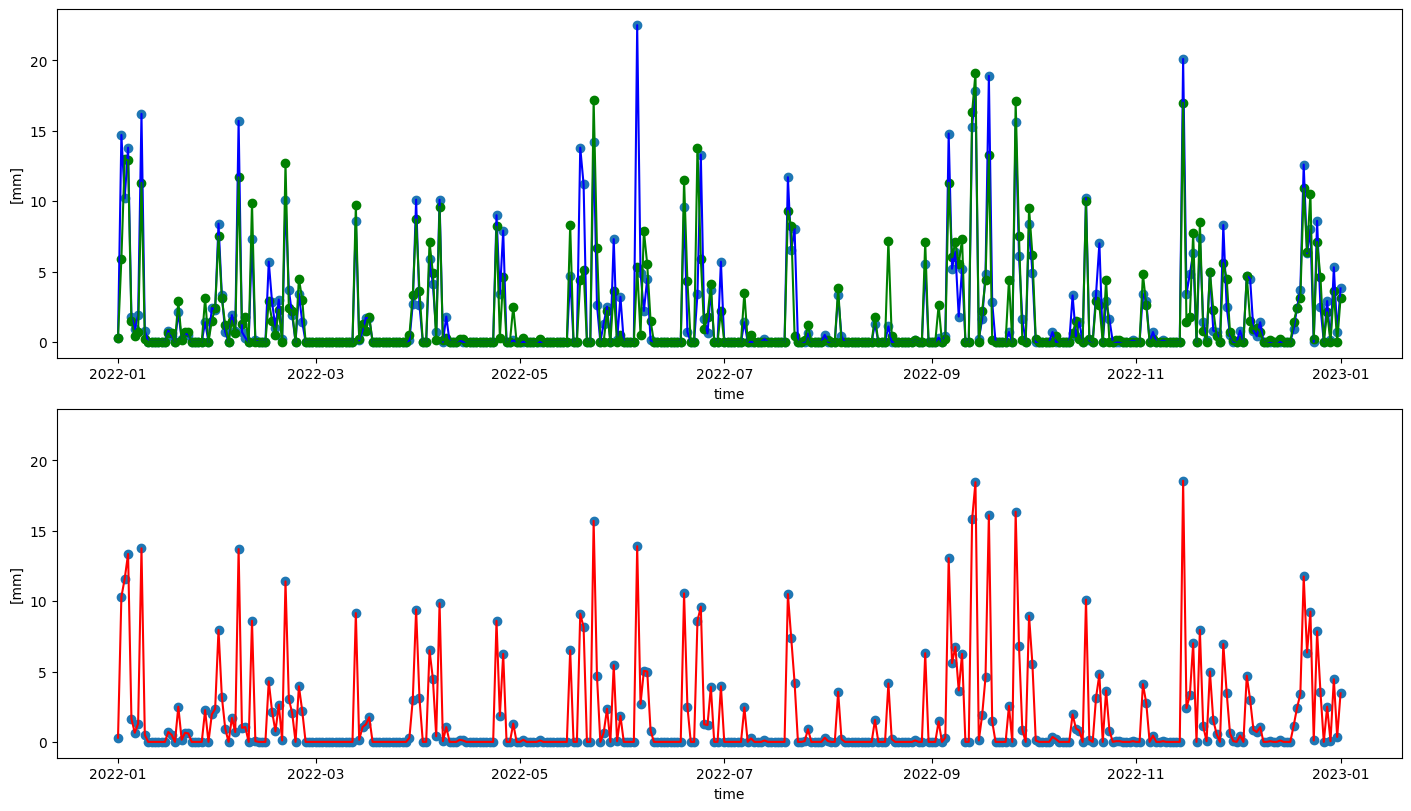

In [12]:
plot_2station_percipitation_per_day(stammheim, airport)

# Daily Data August - September 2022

In [35]:
start = datetime(2022, 8, 1)
end = datetime(2022, 10, 1)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-08-01,21.65,15.20,26.50,0.05,NaN,300.5,11.75,31.3,1016.95,207.0
2022-08-02,22.45,13.35,30.65,0.00,NaN,182.0,9.70,29.5,1017.05,730.0
2022-08-03,25.95,17.20,34.65,0.00,NaN,158.0,7.90,31.3,1014.60,808.0
2022-08-04,26.05,18.40,35.60,3.55,NaN,218.0,10.90,37.1,1012.40,498.0
2022-08-05,19.10,13.60,23.30,0.20,NaN,323.0,12.60,35.3,1017.15,107.0


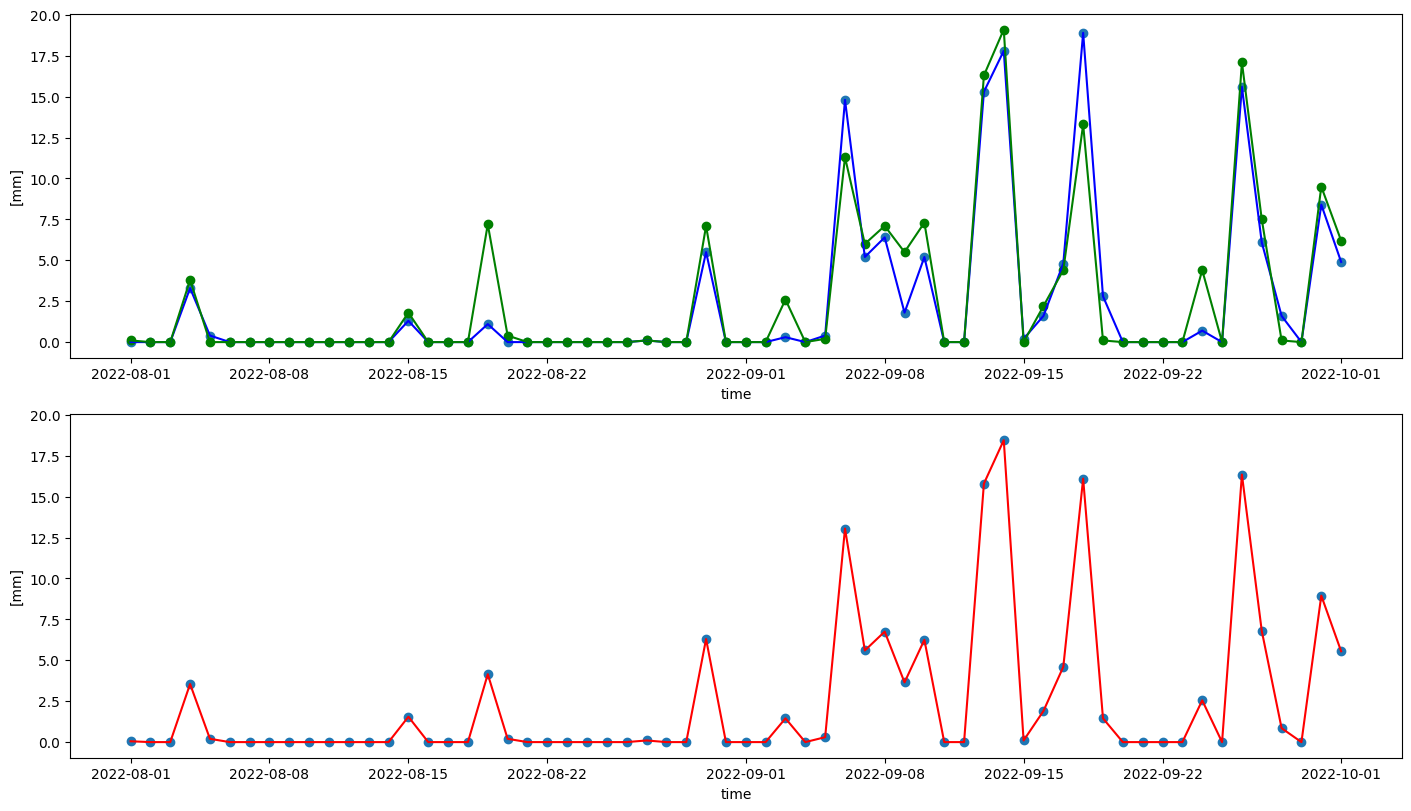

In [36]:
plot_2station_percipitation_per_day(stammheim, airport)

# Daily Data December 2021 - February 2022

In [15]:
start = datetime(2021, 12, 15)
end = datetime(2022, 2, 21)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,8.75,7.85,10.00,0.05,0.0,195.0,6.00,16.6,1031.55,2.0
2021-12-16,8.65,6.95,9.80,0.00,0.0,208.5,4.50,14.8,1036.95,0.0
2021-12-17,7.55,1.95,9.05,0.05,0.0,66.5,4.25,14.8,1039.55,0.0
2021-12-18,4.40,1.45,6.05,0.35,0.0,230.5,4.80,16.6,1038.55,0.0
2021-12-19,5.95,5.60,6.50,0.15,0.0,293.5,11.80,29.5,1031.15,0.0


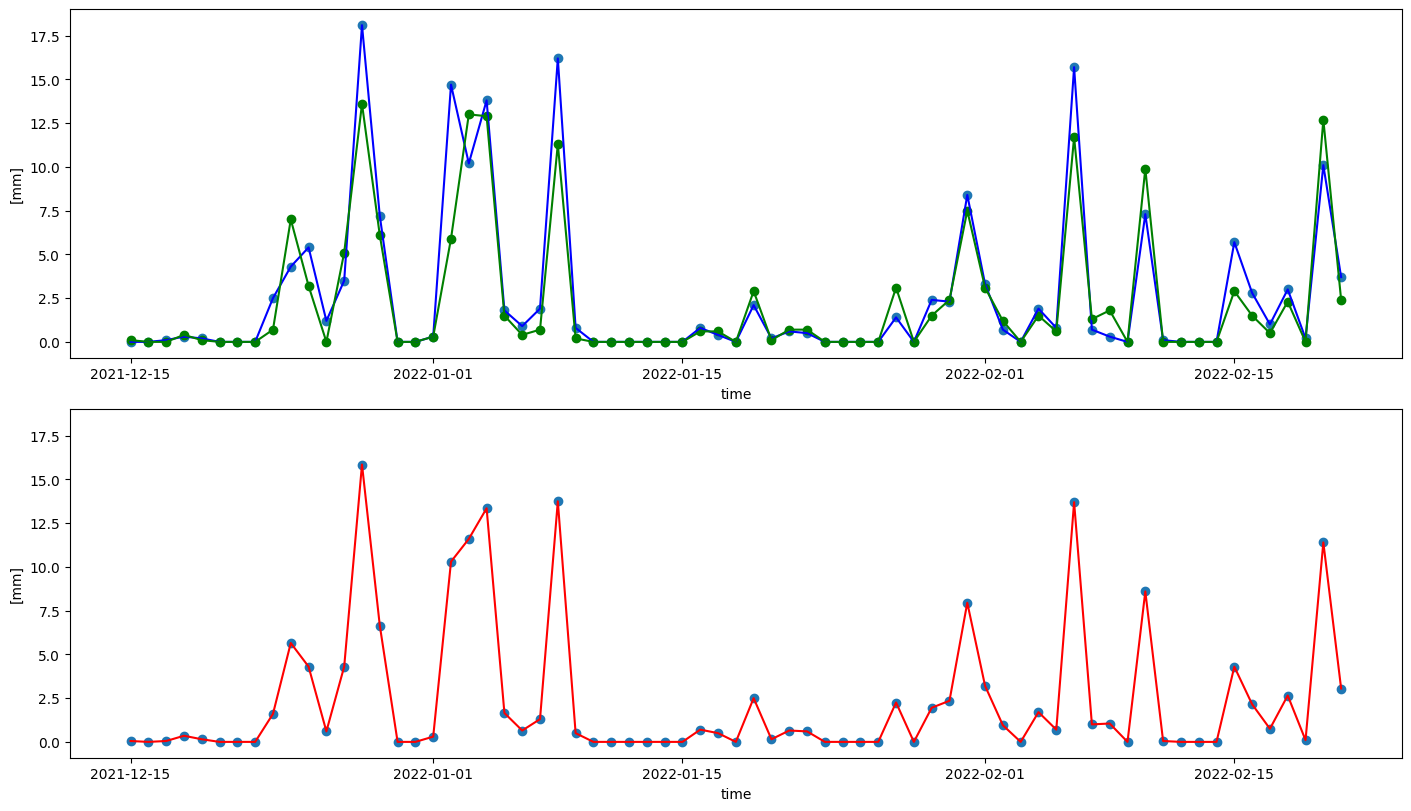

In [16]:
plot_2station_percipitation_per_day(stammheim, airport)

# June - July 2021

In [17]:
start = datetime(2021, 6, 1)
end = datetime(2021, 7, 31)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-06-01,19.15,9.60,25.65,0.00,0.0,118.5,11.75,42.5,1017.10,915.0
2021-06-02,21.05,9.85,28.10,0.05,0.0,130.5,11.70,38.9,1014.95,859.0
2021-06-03,20.30,17.10,24.75,2.30,0.0,145.0,7.95,25.9,1019.05,181.0
2021-06-04,21.05,16.15,28.05,22.90,0.0,118.0,6.35,53.6,1019.75,405.0
2021-06-05,17.55,14.80,21.70,0.35,0.0,254.5,10.95,36.4,1019.80,5.0


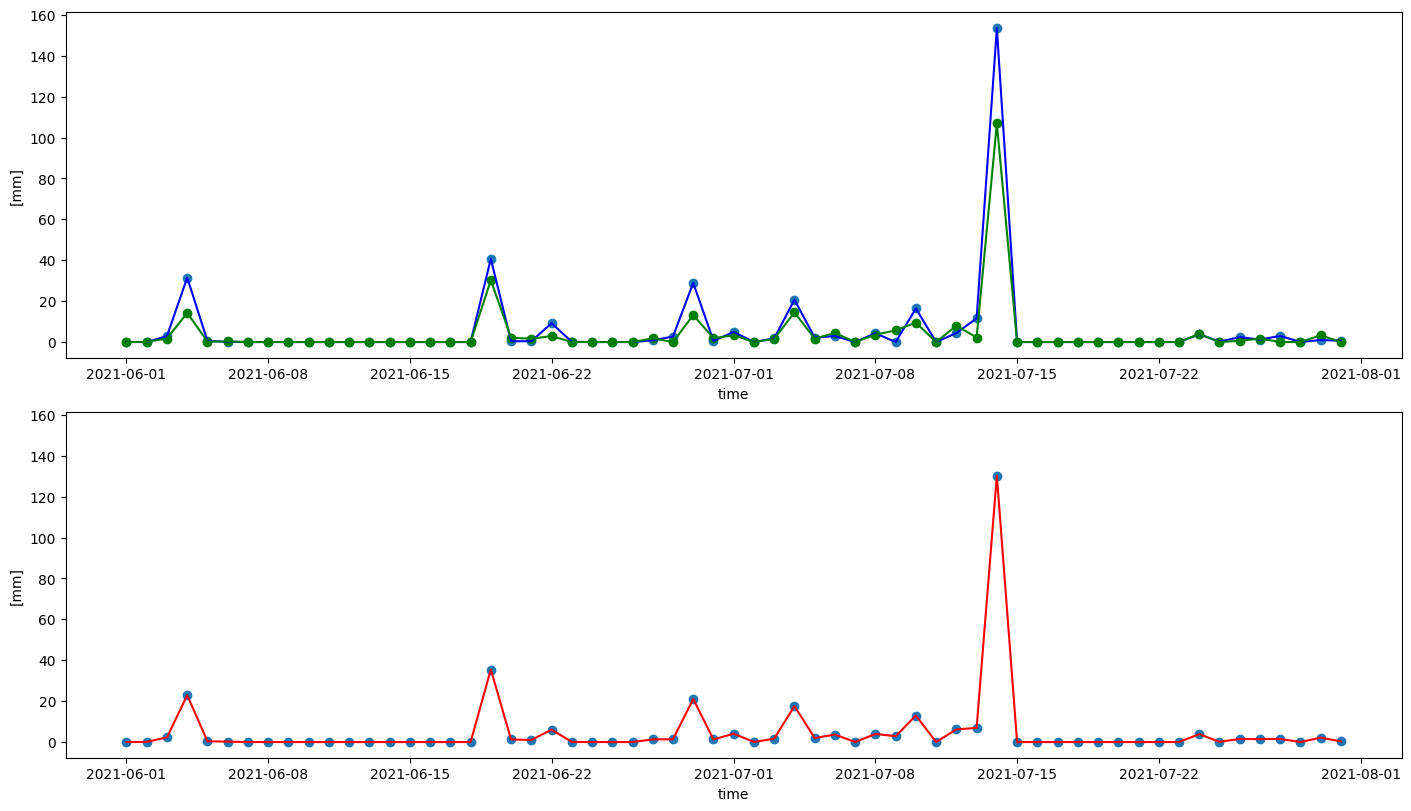

In [18]:
plot_2station_percipitation_per_day(stammheim, airport)

# January 2021 - June 2021

In [19]:
start = datetime(2021, 1, 1)
end = datetime(2021, 7, 1)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-01-01,2.50,0.25,4.80,0.00,0.0,275.0,6.10,14.8,1008.20,45.0
2021-01-02,2.25,1.00,3.75,0.00,0.0,130.0,4.60,13.0,1013.65,0.0
2021-01-03,2.80,1.50,3.95,0.25,0.0,14.5,12.15,33.8,1013.70,0.0
2021-01-04,2.10,1.35,2.95,0.00,0.0,27.5,8.65,16.6,1014.90,0.0
2021-01-05,2.30,1.10,3.35,2.20,0.0,190.5,9.30,20.5,1015.35,0.0


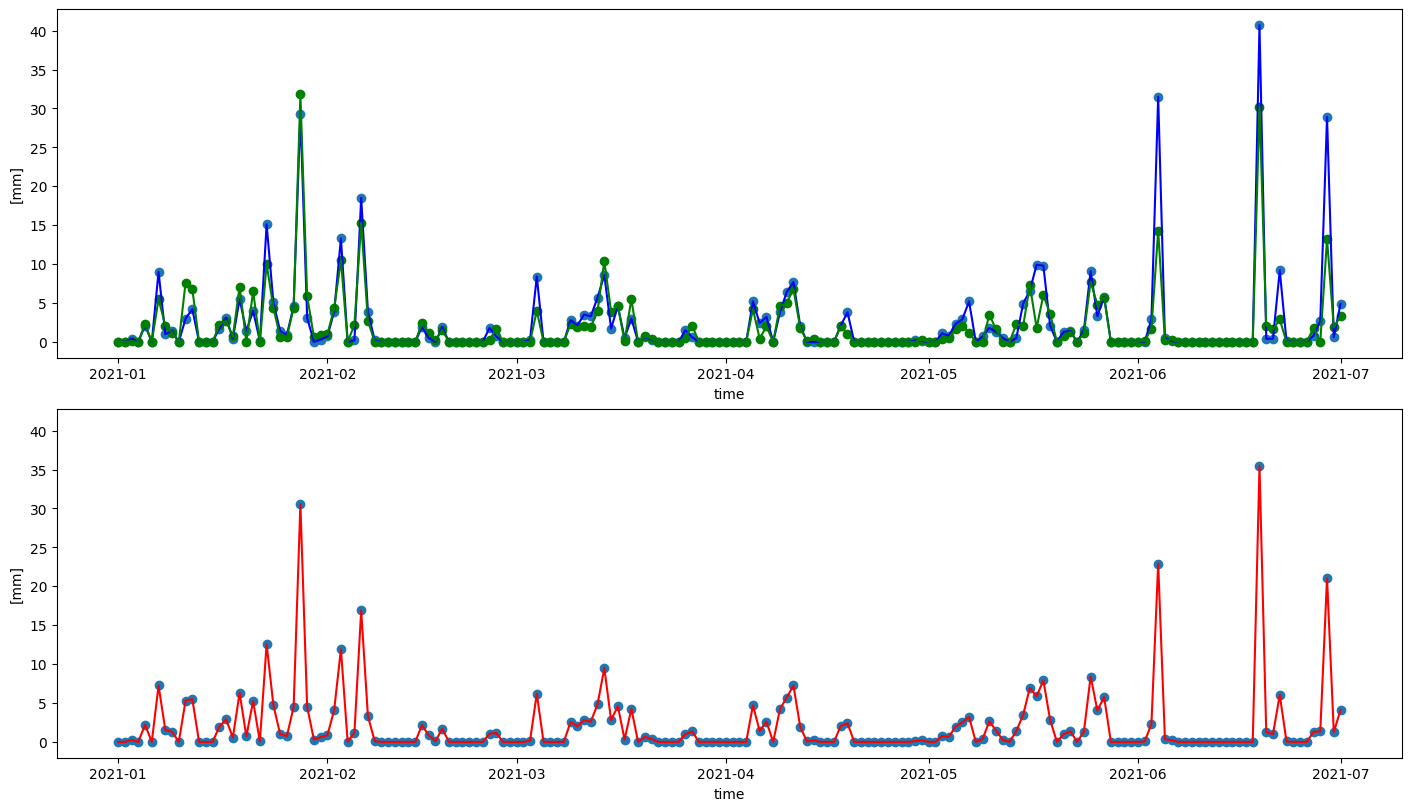

In [20]:
plot_2station_percipitation_per_day(stammheim, airport)

# Data 2020

In [29]:
start = datetime(2020, 1, 1)
end = datetime(2021, 1, 1)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,1.40,-0.50,3.65,0.00,0.0,113.0,14.8,33.5,1032.4,151.0
2020-01-02,2.20,-1.35,5.50,0.00,0.0,134.0,12.6,29.5,1026.7,48.0
2020-01-03,7.85,4.45,10.45,1.85,0.0,201.0,20.2,53.6,1020.1,0.0
2020-01-04,5.50,2.70,7.25,1.15,0.0,270.0,14.8,40.0,1029.7,0.0
2020-01-05,6.45,5.15,7.45,0.00,0.0,231.0,8.3,20.9,1034.2,0.0


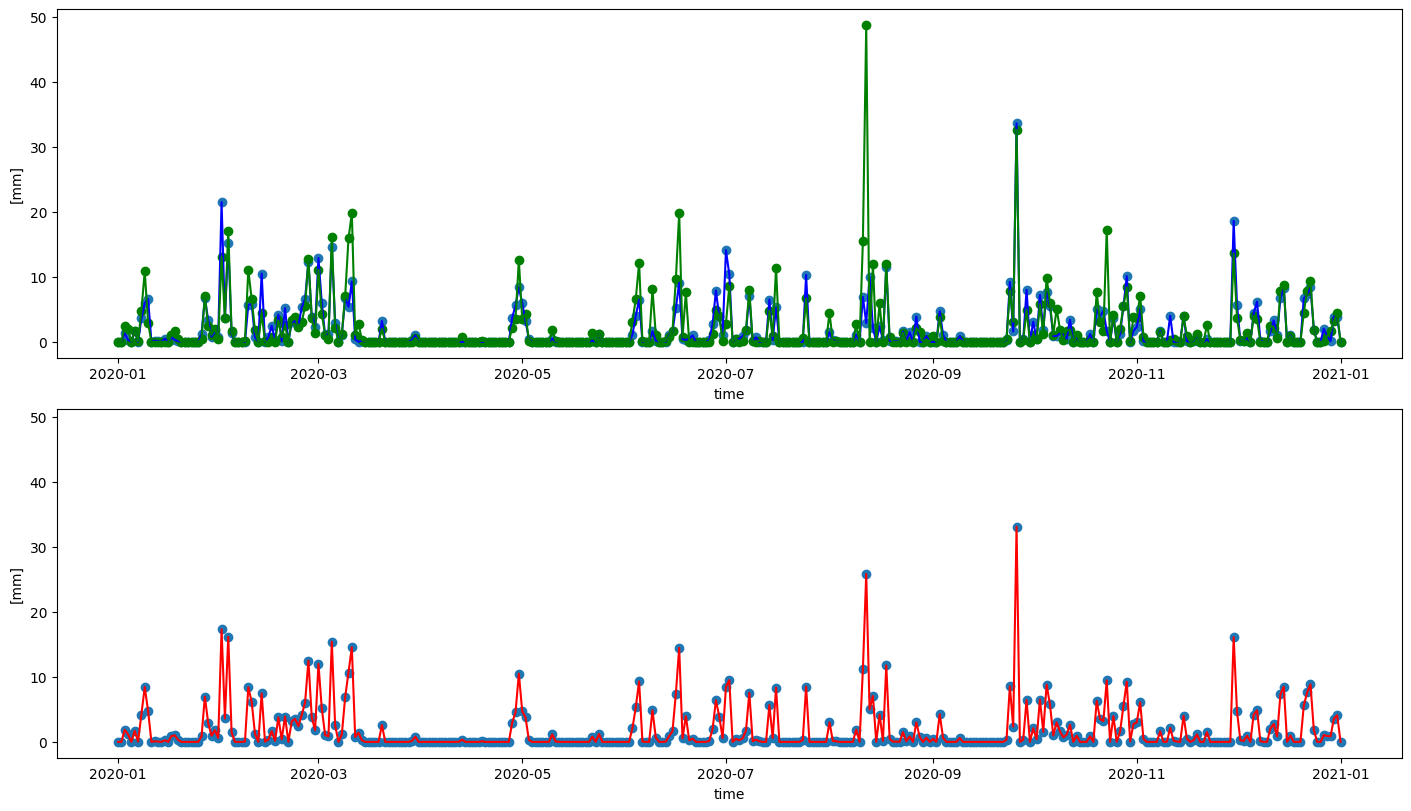

In [30]:
plot_2station_percipitation_per_day(stammheim, airport)

# February 2020

In [21]:
start = datetime(2020, 1, 1)
end = datetime(2020, 2, 28)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,1.40,-0.50,3.65,0.00,0.0,113.0,14.8,33.5,1032.4,151.0
2020-01-02,2.20,-1.35,5.50,0.00,0.0,134.0,12.6,29.5,1026.7,48.0
2020-01-03,7.85,4.45,10.45,1.85,0.0,201.0,20.2,53.6,1020.1,0.0
2020-01-04,5.50,2.70,7.25,1.15,0.0,270.0,14.8,40.0,1029.7,0.0
2020-01-05,6.45,5.15,7.45,0.00,0.0,231.0,8.3,20.9,1034.2,0.0


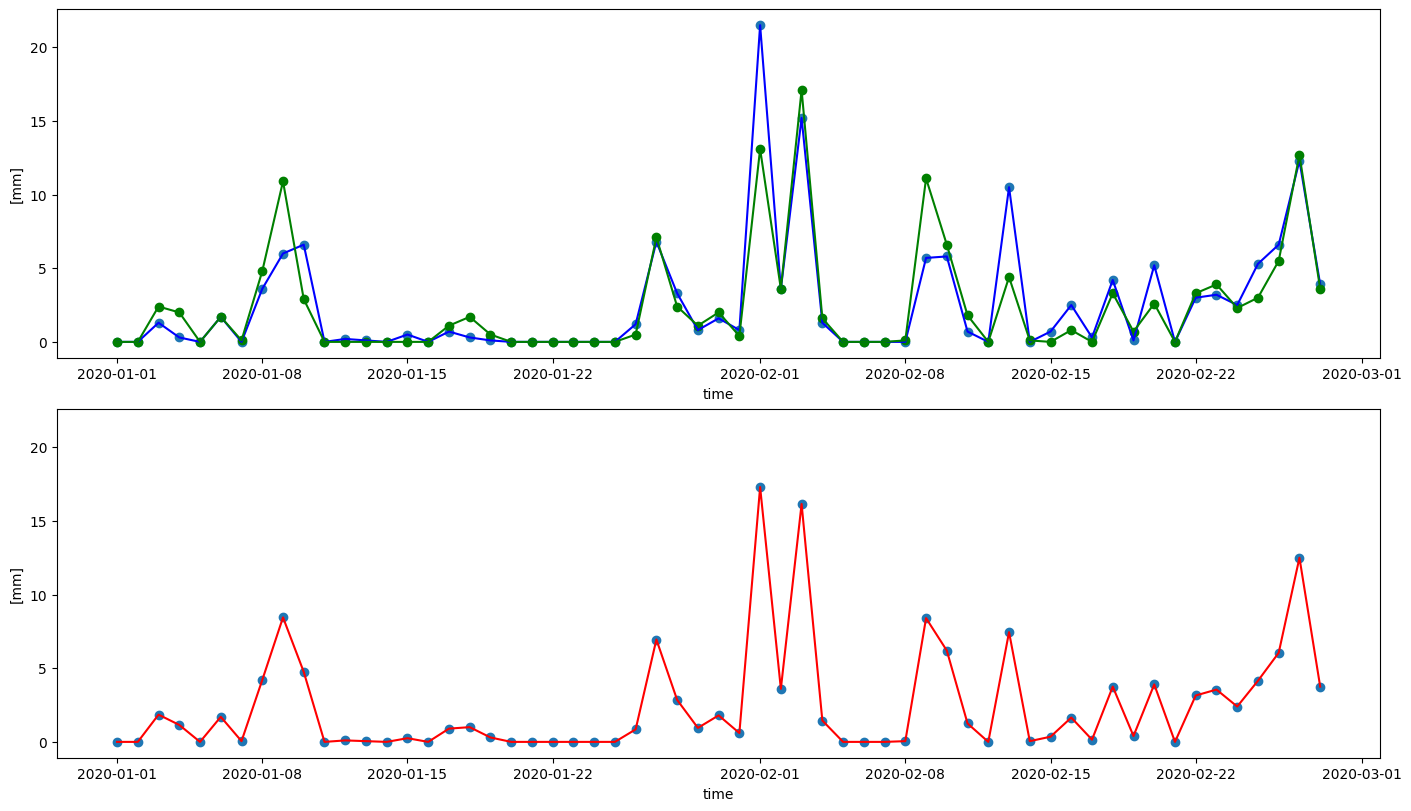

In [22]:
plot_2station_percipitation_per_day(stammheim, airport)

# 2019

In [31]:
start = datetime(2019, 1, 1)
end = datetime(2020, 1, 1)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,6.85,3.75,8.40,1.85,0.0,282.0,19.1,56.2,1028.9,0.0
2019-01-02,3.80,-1.30,6.50,0.15,0.0,322.0,19.1,46.4,1034.2,78.0
2019-01-03,2.70,-1.00,5.15,0.85,0.0,320.0,9.0,27.7,1037.9,12.0
2019-01-04,3.10,1.35,4.60,3.15,0.0,295.0,11.2,40.0,1036.1,0.0
2019-01-05,5.65,3.65,6.65,1.65,0.0,294.0,22.0,49.3,1030.0,0.0


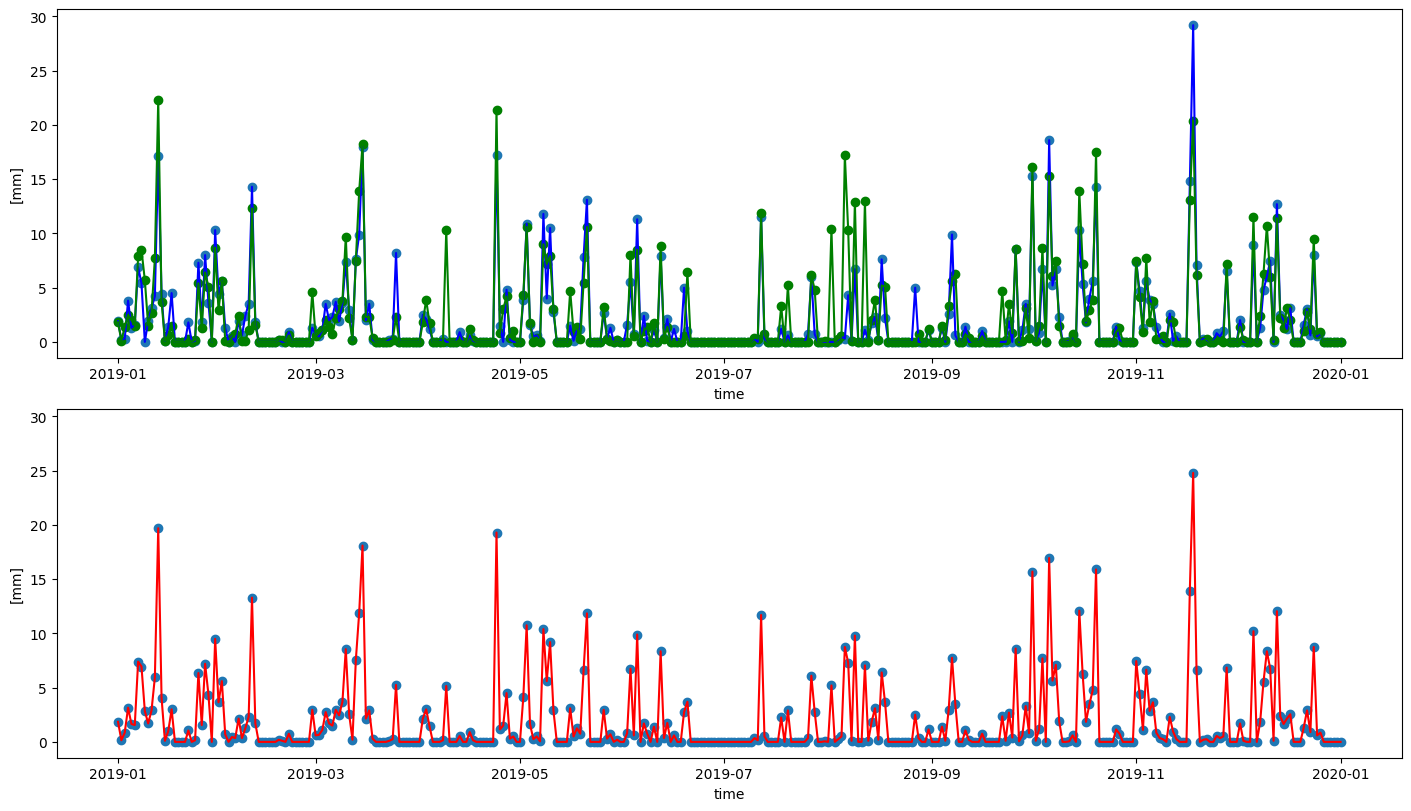

In [32]:
plot_2station_percipitation_per_day(stammheim, airport)

# Juni 2017 - October 2018

In [23]:
start = datetime(2017, 6, 1)
end = datetime(2018, 10, 28)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2017-06-01,19.80,11.85,26.60,0.0,0.0,48.0,7.2,22.3,1020.0,726.0
2017-06-02,21.30,14.65,29.40,2.9,0.0,145.0,9.0,33.5,1015.2,432.0
2017-06-03,20.95,15.45,26.95,7.8,0.0,106.0,11.2,40.0,1011.5,372.0
2017-06-04,16.60,13.05,21.55,0.8,0.0,290.0,11.9,40.7,1014.3,216.0
2017-06-05,17.40,9.60,23.70,0.0,0.0,153.0,9.0,27.7,1012.1,534.0


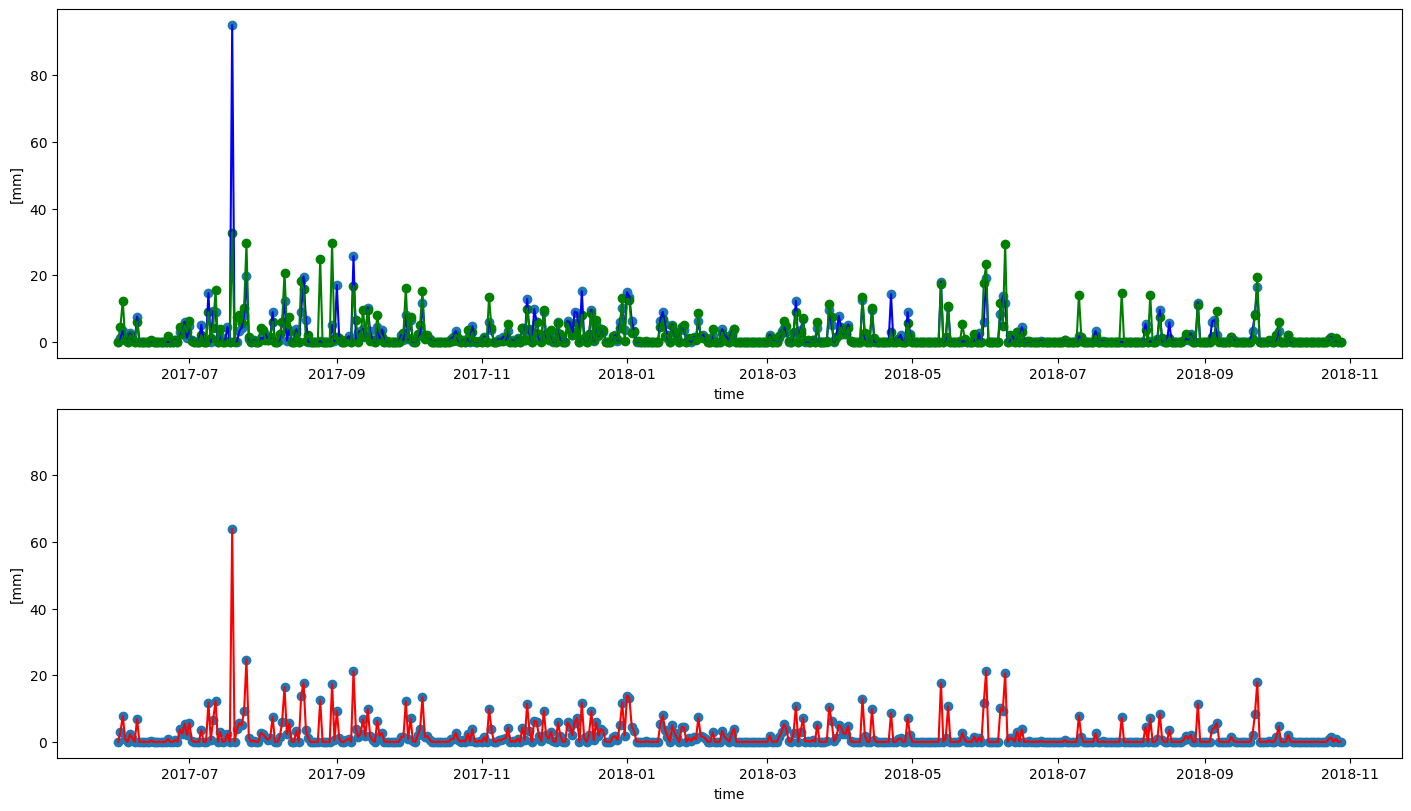

In [24]:
plot_2station_percipitation_per_day(stammheim, airport)

# Januar 2014 - December 2018

In [25]:
start = datetime(2014, 1, 1)
end = datetime(2019, 1, 1)
airport, stammheim, mean = twoWeatherStations.get_data_in_time_interval(start, end)
mean.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2014-01-01,7.00,3.60,9.70,0.05,0.0,145.0,15.5,42.1,1007.8,276.0
2014-01-02,9.10,5.55,10.70,1.35,0.0,177.0,17.6,47.9,1001.3,30.0
2014-01-03,9.25,5.75,13.00,3.80,0.0,169.0,17.6,76.7,1005.0,90.0
2014-01-04,7.65,5.35,9.70,3.70,0.0,136.0,14.8,39.6,1002.8,0.0
2014-01-05,6.75,4.25,9.25,0.00,0.0,201.0,11.9,33.1,1005.7,294.0


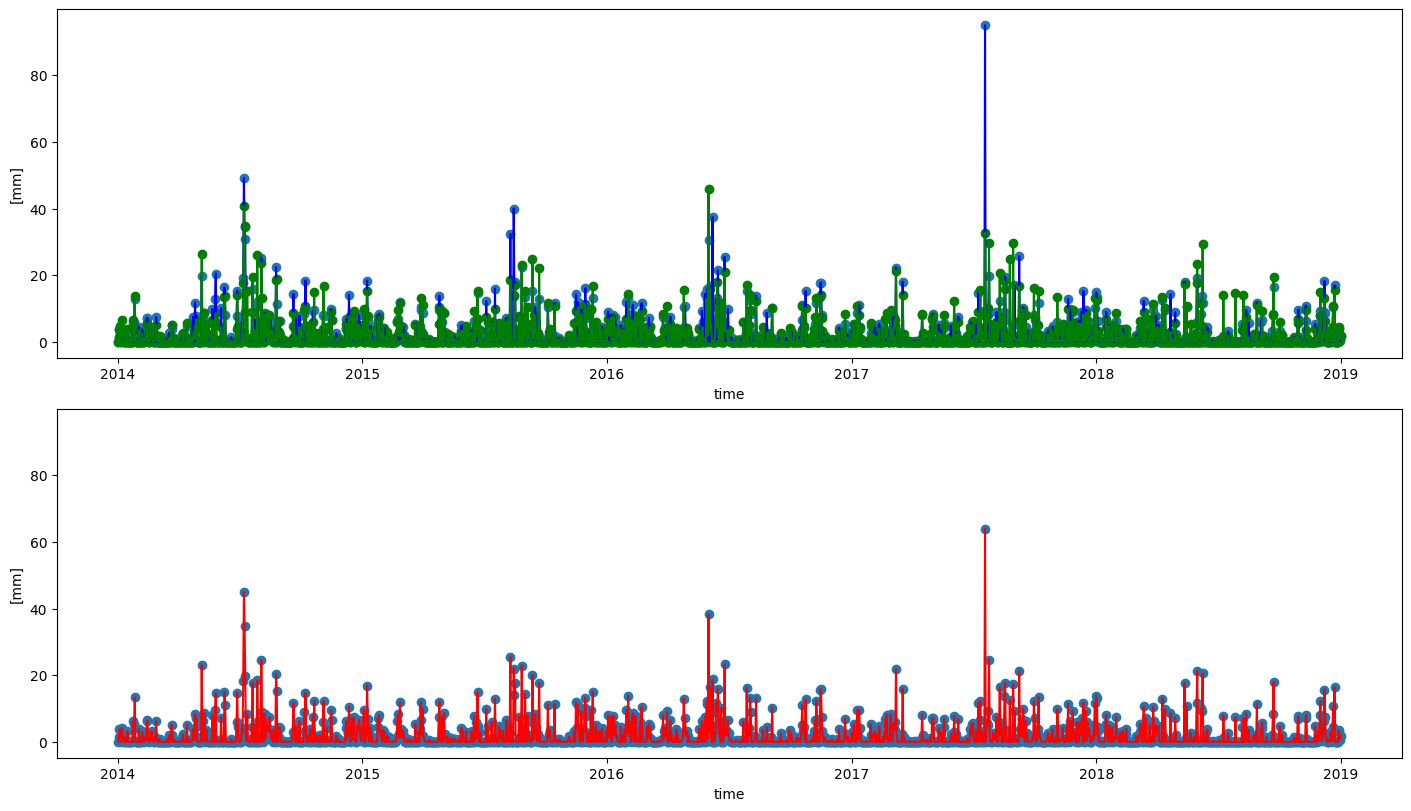

In [26]:
plot_2station_percipitation_per_day(stammheim, airport)